In [45]:
import pandas as pd

In [46]:
train = pd.read_csv('data/train.csv', index_col='PassengerId')

print(train.shape)
train.head()

(891, 11)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [47]:
test = pd.read_csv('data/test.csv', index_col='PassengerId')

print(test.shape)
test.head()

(418, 10)


Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

### Visualization

In [7]:
import seaborn as sns

### countplot

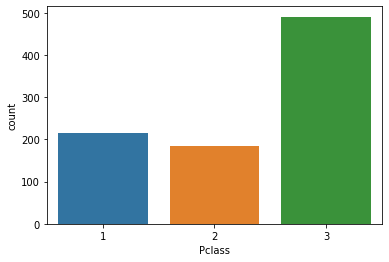

In [10]:
sns.countplot(data=train, x='Pclass')

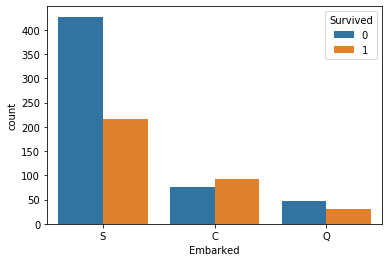

In [16]:
sns.countplot(data=train, x='Embarked', hue='Survived')

### Barplot

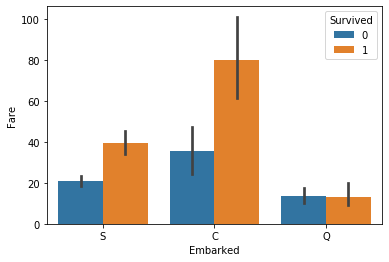

In [17]:
sns.barplot(data=train, x='Embarked', y='Fare', hue='Survived')

#### pointplot

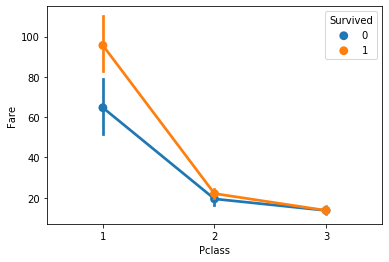

In [19]:
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

#### lmplot

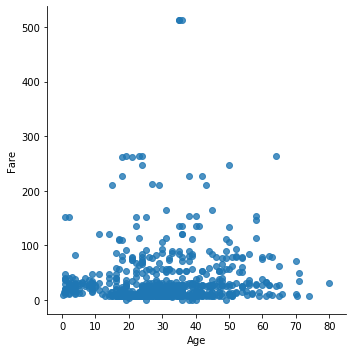

In [21]:
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False)

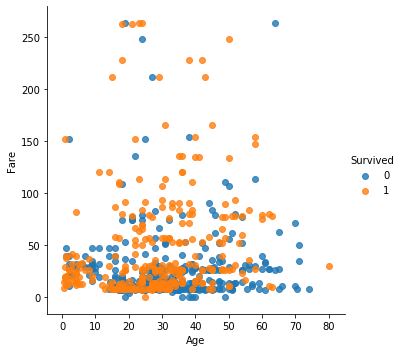

In [28]:
low_fare = train[train['Fare'] < 500]

sns.lmplot(data=low_fare, x='Age', y='Fare', fit_reg=False, hue='Survived')

#### distplot

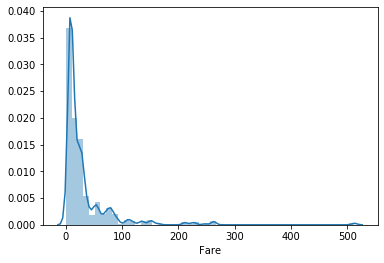

In [29]:
sns.distplot(train['Fare'])

### Preprocessing (전처리)

In [48]:
train['Sex_encoded'] = train['Sex'].replace('female', 1).replace('male', 0)

print(train.shape)
train.head()

(891, 12)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

             Sex_encoded  
PassengerId               
1                      0  
2                      1  
3                      1  
4                      1  
5                      0

In [49]:
test['Sex_encoded'] = test['Sex'].replace('female', 1).replace('male', 0)

print(test.shape)
test.head()

(418, 11)


Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_encoded  
PassengerId                                                                    
892          34.5      0      0   330911   7.8292   NaN        Q            0  
893          47.0      1      0   363272   7.0000   NaN        S            1  
894          62.0      0      0   240276   9.6875   NaN        Q            0  
895          27.0      0      0   315154   8.6625   NaN        S            0  
896          22.0      1      1  3101298  12.2875   NaN        S            1

In [84]:
train[train['Fare'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sex_encoded]
Index: []

In [91]:
#test['Fare'].isnull().sum()
test[test['Fare'].isnull()]

Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
PassengerId                                                                
1044              3  Storey, Mr. Thomas  male  60.5      0      0   3701   

             Fare Cabin Embarked  Sex_encoded  Fare_fillin  
PassengerId                                                 
1044          NaN   NaN        S            0          0.0

In [101]:
train['Fare_fillin'] = train['Fare'].fillna(0)

print(train.shape)
train.head()

(891, 14)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

             Sex_encoded  Fare_filiin  Fare_fillin  
PassengerId                                         
1                      0       7.2500       7.2500  
2                      1      71.2833      71.2833  
3                      1       7.9250       7.9250  
4                      1      53.1000      53.1000  
5                      0       8.0500       8.0500

In [ ]:
test['Fare_fillin'] = test['Fare'].fillna(0)

print(test.shape)
test.head()

In [95]:
test.loc[[1044]]

Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
PassengerId                                                                
1044              3  Storey, Mr. Thomas  male  60.5      0      0   3701   

             Fare Cabin Embarked  Sex_encoded  Fare_fillin  
PassengerId                                                 
1044          NaN   NaN        S            0          0.0

### Model

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
feature_names = ['Sex_encoded', 'Pclass', 'Fare_fillin']

feature_names

['Sex_encoded', 'Pclass', 'Fare_fillin']

In [102]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 3)


Sex_encoded  Pclass  Fare_fillin
PassengerId                                  
1                      0       3       7.2500
2                      1       1      71.2833
3                      1       3       7.9250
4                      1       1      53.1000
5                      0       3       8.0500

In [103]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 3)


Sex_encoded  Pclass  Fare_fillin
PassengerId                                  
892                    0       3       7.8292
893                    1       3       7.0000
894                    0       2       9.6875
895                    0       3       8.6625
896                    1       3      12.2875

In [104]:
label = 'Survived'

In [105]:
y_train = train[label]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

#### training

In [110]:
model = DecisionTreeClassifier(max_depth=5)

model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
from sklearn.tree import export_graphviz
import graphviz

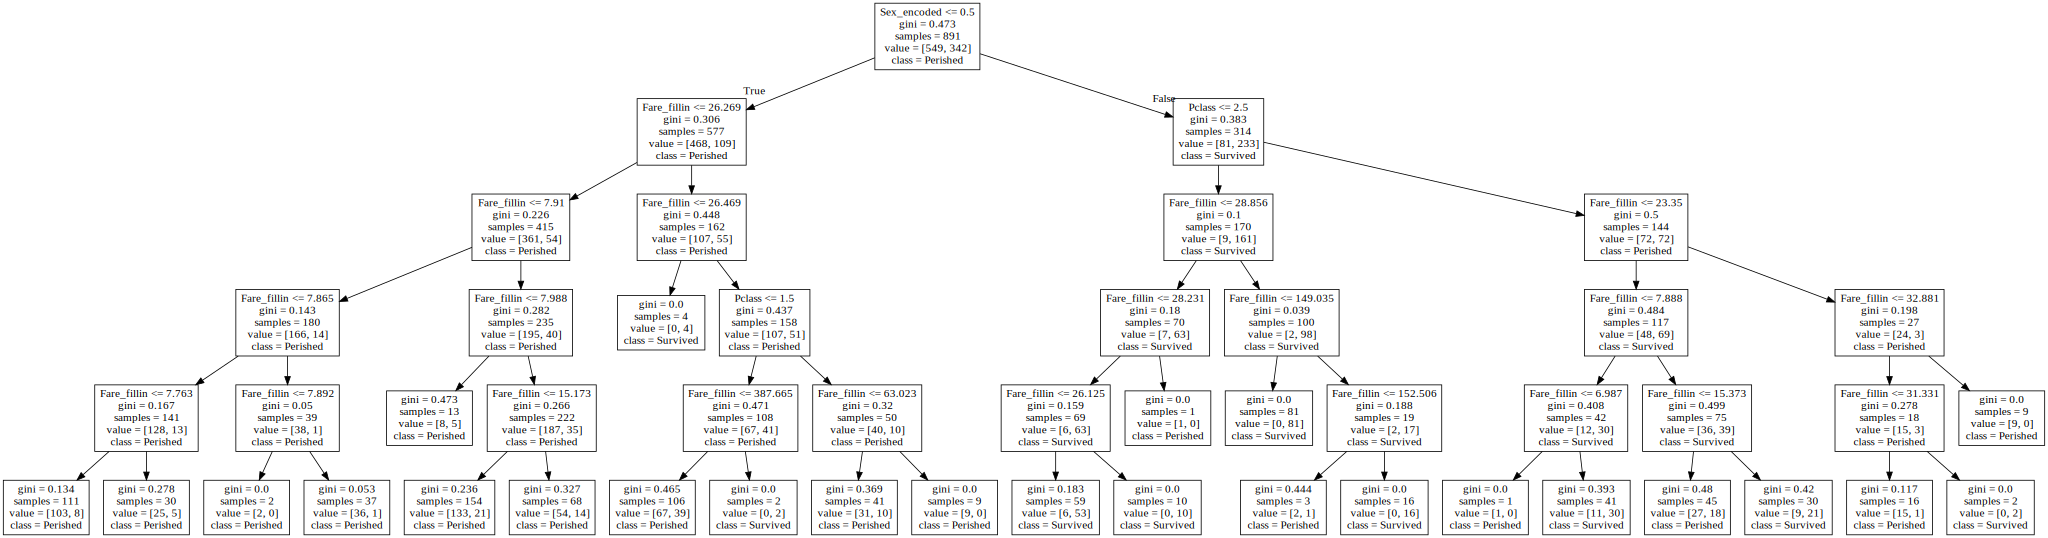

In [115]:
tree = export_graphviz(model, feature_names=feature_names,
                      class_names=['Perished', 'Survived'])

graphviz.Source(tree)

#### Prediction

In [116]:
prediction = model.predict(X_test)

prediction[:5]

array([0, 1, 0, 0, 0])

### Submission

In [ ]:
submission = pd.read_csv('data/gender_submission.csv',
                         index_col='PassengerId')

print(submission.shape)
submission.head()

In [ ]:
submission[label] = prediction

submission.head()

In [126]:
submission.to_csv('data/baseline.csv')